# **Concepts with Multivariate Linear Regression**

Our initial foundation in modeling is predicated on understanding of linear regression and gradient descent. This was initially presented for the case where our model could be represented in the form:

$$f(x) = \sum_i \theta_i g_i(x) $$

In the above equation, the model is linear in its parameters (not necessarily its inputs), and also notably only has a *single* input variable, $x$.

 An important conceptual extension will be handling multivariate inputs. In the context of machine learning, our inputs (*feature vectors* $\mathbf{x}$) that describe our data are often high-dimensional. For example, molecules may be represented as vectors that are 2048-dimensional!

 In the following, we will try to show that this is truly of no significant additional difficult for linear regression, and therefore, we should not be scared by this idea when we encounter it in other settings either.

 Begin by running the cell below to load modules that were used by Prof. Webb to do this activity.

In [ ]:
# modules used by Prof. Webb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn import preprocessing
from   scipy.optimize import minimize

## **Description of data**

We are going to use a small, contrived dataset here that features 3 variables. The dataset is about the cost of some engineering equipment based on unit complexity and square footage. Running the cell below will grab the data from the GitHub and generate some arrays. For the purposes of this exercise, we will treat the size, $s$ (ft${}^2$) and number of units $n$ as inputs and the capital cost $c$ (\$) as the model output.

Ultimately, we are going to create a model of the form

$$ c(s,n) = \theta_0 + \theta_1 s+ \theta_2 n$$

You should think of our input as a feature vector $\boldsymbol{x} = (s,n)^T$

In [ ]:
# extract the data
url_for_data = "https://raw.githubusercontent.com/webbtheosim/CBE512-MLinChmSciEng/main/data/lecture_capital_cost.txt"
data = pd.read_csv(url_for_data)
print(data.head(5))

# partition into features (X)/ labels (y)
X = np.array(data.iloc[:,:2])
y = np.array(data.iloc[:,2])
print(X[:4,:],y[:4])

   Size  Units  Capital
0  2104      3   399900
1  1600      3   329900
2  2400      3   369000
3  1416      2   232000
4  3000      4   539900
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]] [399900 329900 369000 232000]


# **Examine the data**

Study and run the cell below to generate a plot of the data. I am going to do some additional things in the cell to just expose folks to some additional python functions/methods.

0 0.476552652690591
1 0.5272171138844615
2 0.4320777846701732
3 0.12097144575280272
4 0.3377028906183367


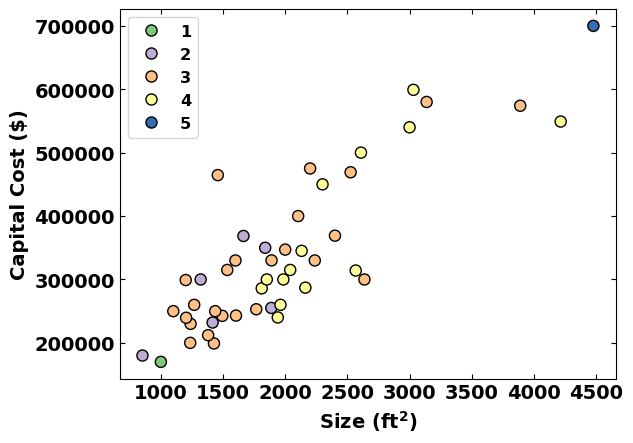

In [ ]:
# global specifications on plots
plt.rcParams.update({'font.size': 14,
                     'font.weight' : 'bold',
                     'axes.labelweight': 'bold',
                     'lines.markersize' : 8})

# function for creating plot
def plot_raw_data(x,y,c='b',lbls=None):

  plt.ylabel("Capital Cost ($)")
  plt.xlabel("Size (ft${}^2$)")

  # the following handles plotting categorical variables with
  # different colors
  if isinstance(c,dict):
    colors = np.zeros((x.shape[0],4))
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o',\
                          markeredgecolor='k', linestyle='')
               for color in c.values()]
    plt.legend(markers, lbls,loc='best',fontsize='small')
    for key in c:
      inds4key = x[:,1] == key
      colors[inds4key] = c[key][:]
    c = colors
  plt.scatter(x[:,0], y,marker='o',\
           color=c,edgecolor='k')
  ax = plt.gca()
  ax.tick_params(direction='in')
  ax.yaxis.set_ticks_position('both')
  ax.xaxis.set_ticks_position('both')

  return ax

cmap = plt.colormaps['Accent']
cDict   = {nEq: cmap(i) for i,nEq in enumerate(sorted(set(X[:,1])))}
lbls    = list(cDict.keys())
ax = plot_raw_data(X,y[:],cDict,lbls)

m = np.random.random((5))
for i,v in enumerate(m):
  print(i,v)

## **Feature Scaling**

Write a function that performs some linear scaling on your input and output data. Implement this same scaling strategy in scikit-learn to verify the implementation and get used to scikit syntax. You can play around with the various scalers and replot the data in its scaled form.

Text(0.5, 0, 'Normalized Size')

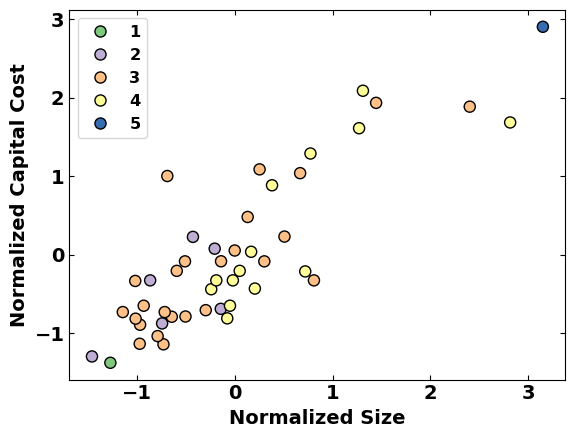

In [ ]:
def myScaler(X,y):
  '''Function that takes as input an array of features and outputs a scaled dataset
  '''
  ###BEGIN SOLUTION

  ###END SOLUTION
  return X_norm, y_norm

#Xsc,ysc = myScaler(X)

###BEGIN SOLUTION

# example for scikit learn
X_stdscaler = preprocessing.StandardScaler().fit(X)
X_std       = X_stdscaler.transform(X)
y_stdscaler = preprocessing.StandardScaler().fit(y.reshape(-1,1))
y_std       = y_stdscaler.transform(y.reshape(-1,1))
###END SOLUTION

cDict   = {nEq: cmap(i) for i,nEq in enumerate(sorted(set(X_std[:,1])))}
ax = plot_raw_data(X_std,y_std,cDict,lbls)
ax.set_ylabel("Normalized Capital Cost")
ax.set_xlabel("Normalized Size")

## **Model Optimization by Gradient Descent**

Use the cells below to code a cost function and the gradient descent algorithm. Make sure the Gradient Descent algorithm you come up with stores its progress with iterations, then plot the loss as a function of iterations. If everything is scaled to ~1, then you should use a step size ~0.01-0.001 to start.

In [ ]:
###BEGIN SOLUTION
def E2loss(ypred,y):
    return np.sum(ypred[:]-y[:])**2/len(y)

def Grad_Descent(X,y,theta,alpha,nIters):
  '''Gradient descent algorithm
  Inputs:
  X = dependent variables, comes in at Nx2
  y = training data, comes in at Nx1
  theta = parameters, comes in as 3x1
  alpha = learning rate
  iters = number of iterations
  Output:
  theta = final parameters
  E = array of cost as a function of iterations
  '''
  n        = len(y) #number of training examples
  features = np.ones((n,len(theta)))
  features[:,1:] = X[:]
  ypred  = features@theta # predictions with current hypothesis

  E_hist = [E2loss(ypred,y)]
  for i in range(nIters):
    e     = ypred[:,0] - y[:,0]
    theta = theta - (alpha*e[:,np.newaxis].T@features).T #
    ypred = features@theta # predictions with current hypothesis
    E_hist.append(E2loss(ypred,y))

  return theta,E_hist

###END SOLUTION

The optimal parameters found are 
 [[-7.52436308e-17]
 [ 8.84765988e-01]
 [-5.31788196e-02]]
The prediction from  [[1650    3]] is  [[293081.464336]]


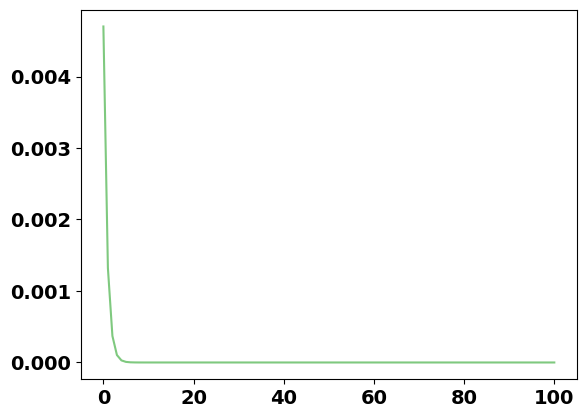

In [ ]:
## Now test your gradient descent algorithm

###BEGIN SOLUTION
theta0 = np.array([[0.01],[0.01],[0.01]])
theta_GD, E_GD = Grad_Descent(X_std,y_std,theta0,.01, 100)
plt.plot(E_GD[:])

###END SOLUTION
Xtest    = np.array([[1650,3]]) # input
Xtest_sc = X_stdscaler.transform(Xtest)
Ytest_sc = theta_GD[0] + Xtest_sc@theta_GD[1:,0]
Ytest    = y_stdscaler.inverse_transform(Ytest_sc.reshape(-1,1))
print("The optimal parameters found are \n", theta_GD)
print("The prediction from ", Xtest, "is ", Ytest)

## **Comparison to solution via the "Normal Equations"**

As mentioned in lecture, the linear least-squares problem can be solved exactly using linear algebra. We can compare our solution to that one by running the cell below.

In [ ]:
##Normal Equations

Xtest    = np.array([[1,1650,3]]) # input

###BEGIN SOLUTION

#Set up feature matrix
n        = len(y) #number of training examples
features = np.ones((n,3))
features[:,1:] = X[:]

XXinv = np.linalg.inv(features.T @ features)
theta = XXinv @ features.T @ y

cost = np.dot(Xtest,theta)

print("The optimal parameters found are \n", theta)
print("The prediction from ", Xtest, "is ", cost)
###END SOLUTION

The optimal parameters found are 
 [89597.9095428    139.21067402 -8738.01911233]
The prediction from  [[   1 1650    3]] is  [293081.4643349]


## **Optimization using Python**

We can also solve the same problem using optimization methods provided by Python. Ultimately, this is going to be the pathway forward. We have coded gradient descent. In principle, we could code from scratch other optimization methods. However, we can and should make use of good tools that are available when they are available and suitable to our needs.

Here we use [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) from scipy which has many algorithms available. However, using this function, we should note there is pretty singificant dependence on our initial guess. Be wary of this in the future! How can we combat this kind of situation?

In [ ]:
def E2lossv2(theta,X,y):
    thetaVec = theta.T
    ypred    = theta[0] + X@thetaVec[1:]
    return np.sum(ypred[:]-y[:])**2/len(y)

loss = lambda theta: E2lossv2(theta,X_std,y_std)
theta0 = np.array([8.11502877e-05,8.26550700e-01,4.63616701e-03])
res = minimize(loss,theta0,tol=1e-12,method='BFGS')
theta_py = res.x[:]
Ytest_sc = theta_py[0] + Xtest_sc@theta_py[1:].T
Ytest    = y_stdscaler.inverse_transform(Ytest_sc.reshape(-1,1))
print("The optimal parameters found are \n", theta_py)
print("The prediction from ", Xtest, "is ", Ytest)

The optimal parameters found are 
 [-7.44660311e-09  8.26550700e-01  4.63616701e-03]
The prediction from  [[   1 1650    3]] is  [[294676.60596926]]
